In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['font.family'] = 'NanumGothic'
# mpl.rcParams['axes.unicode_minus'] = False
# mpl.style.use('seaborn-whitegrid')

%matplotlib inline

### 데이터 확인

In [29]:
train_df = pd.read_csv('../../data/toast_processed_train_v2.csv')
val_df = pd.read_csv('../../data/dev.csv')

print('train data shape')
print(train_df.shape)
print('validation data shape')
print(val_df.shape)

train data shape
(33889, 6)
validation data shape
(550, 6)


In [30]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴 도 있고 반전 여느 한국영 화 쓰레기 들 하고는 차원 이 다르네요,반전 도 있고 사랑 재미 있네요,2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제 가 접근 권한 이 없다고 뜹니다,오 액세스 권한 이 없다고 합니다,4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택 청약 조건 변경 해주세요,주택 청약 무 기준 변경 해주세요,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면 으로 만나 반가웠습니다,화상 으로만 보다가 리얼 로 만나니 정말 반가웠습니다,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요,꼬옥 실제 로 한번 뵈어요 뿌뿌 뿌,0.0,0.0


In [31]:
train_df['source'].unique()

array(['nsmc-sampled', 'slack-rtt', 'petition-sampled', 'slack-sampled',
       'nsmc-rtt', 'petition-rtt'], dtype=object)

In [32]:
print("="*10, 'train data info', "="*10)
train_df.info()
print()
print("="*10, 'validation data info', "="*10)
val_df.info()

========== train data info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33889 entries, 0 to 33888
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            33889 non-null  object 
 1   source        33889 non-null  object 
 2   sentence_1    33889 non-null  object 
 3   sentence_2    33888 non-null  object 
 4   label         33889 non-null  float64
 5   binary-label  33889 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.6+ MB

========== validation data info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   bina

In [33]:
train_df['label'].astype('int').value_counts()

label
0    7414
2    6354
4    6354
3    6354
1    6354
5    1059
Name: count, dtype: int64

In [34]:
val_df['label'].astype('int').value_counts()

label
2    110
3    110
4    110
1    110
0     88
5     22
Name: count, dtype: int64

In [35]:
# 중복 데이터 확인
train_df[train_df.duplicated('sentence_1', keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴 도 있고 반전 여느 한국영 화 쓰레기 들 하고는 차원 이 다르네요,반전 도 있고 사랑 재미 있네요,2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제 가 접근 권한 이 없다고 뜹니다,오 액세스 권한 이 없다고 합니다,4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택 청약 조건 변경 해주세요,주택 청약 무 기준 변경 해주세요,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면 으로 만나 반가웠습니다,화상 으로만 보다가 리얼 로 만나니 정말 반가웠습니다,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이 가 뜨지져 스크롸 이스트 휏,오 마이 갓 지저스 스 크론 이스트 팬,2.6,1.0
...,...,...,...,...,...,...
33884,boostcamp-sts-v1-train-4134,petition-sampled,이명박 출국 금지 바랍니다,출국 금지 해 주세요,4.5,1.0
33885,boostcamp-sts-v1-train-6720,petition-rtt,MB 출국금지 청원 합니다,이명박 출국금지 청원 합니다,4.5,1.0
33886,boostcamp-sts-v1-train-6720,petition-rtt,MB 출국금지 청원 합니다,이명박 출국금지 청원 합니다,4.5,1.0
33887,boostcamp-sts-v1-train-9065,petition-rtt,죽고싶어요 913,죽고싶다 913,4.5,1.0


In [36]:
train_df[train_df.duplicated('sentence_2', keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴 도 있고 반전 여느 한국영 화 쓰레기 들 하고는 차원 이 다르네요,반전 도 있고 사랑 재미 있네요,2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제 가 접근 권한 이 없다고 뜹니다,오 액세스 권한 이 없다고 합니다,4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택 청약 조건 변경 해주세요,주택 청약 무 기준 변경 해주세요,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면 으로 만나 반가웠습니다,화상 으로만 보다가 리얼 로 만나니 정말 반가웠습니다,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이 가 뜨지져 스크롸 이스트 휏,오 마이 갓 지저스 스 크론 이스트 팬,2.6,1.0
...,...,...,...,...,...,...
33884,boostcamp-sts-v1-train-4134,petition-sampled,이명박 출국 금지 바랍니다,출국 금지 해 주세요,4.5,1.0
33885,boostcamp-sts-v1-train-6720,petition-rtt,MB 출국금지 청원 합니다,이명박 출국금지 청원 합니다,4.5,1.0
33886,boostcamp-sts-v1-train-6720,petition-rtt,MB 출국금지 청원 합니다,이명박 출국금지 청원 합니다,4.5,1.0
33887,boostcamp-sts-v1-train-9065,petition-rtt,죽고싶어요 913,죽고싶다 913,4.5,1.0


In [37]:
train_df.duplicated(['sentence_1', 'sentence_2']).sum()

13441

In [38]:
val_df[train_df.duplicated('sentence_1', keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
5,boostcamp-sts-v1-dev-005,slack-rtt,사진 간지.. ㅋㅋ 축하드립니다,사진이 나왔어요..ㅋㅋㅋ 축하드립니다.,2.4,0.0
...,...,...,...,...,...,...
541,boostcamp-sts-v1-dev-541,nsmc-sampled,최고의 농촌드라마.,진심 최고의 드라마.,2.0,0.0
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


In [39]:
val_df[train_df.duplicated('sentence_2', keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
5,boostcamp-sts-v1-dev-005,slack-rtt,사진 간지.. ㅋㅋ 축하드립니다,사진이 나왔어요..ㅋㅋㅋ 축하드립니다.,2.4,0.0
...,...,...,...,...,...,...
541,boostcamp-sts-v1-dev-541,nsmc-sampled,최고의 농촌드라마.,진심 최고의 드라마.,2.0,0.0
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


### 시각화

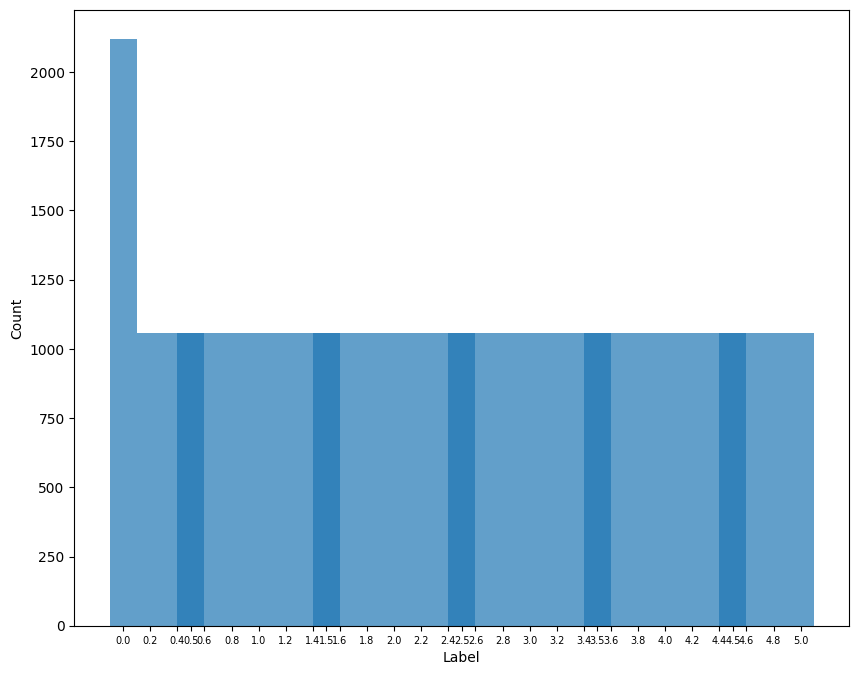

In [40]:
# train
train_label_count = train_df['label'].value_counts()

plt.figure(figsize=(10, 8))
plt.bar(train_label_count.keys(), train_label_count.values, width=0.2, alpha=.7)
plt.xticks(train_label_count.keys(), fontsize=7)
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

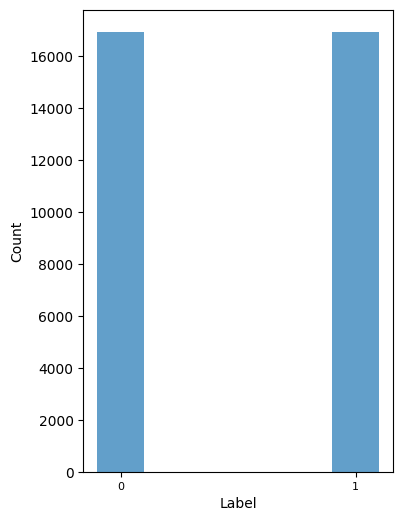

In [41]:
# train
train_label_count = train_df['binary-label'].value_counts()

plt.figure(figsize=(4,6))

plt.bar(train_label_count.keys(), train_label_count.values, width=0.2, alpha=0.7)
plt.xticks(train_label_count.keys(), fontsize=8)
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

<Axes: xlabel='label'>

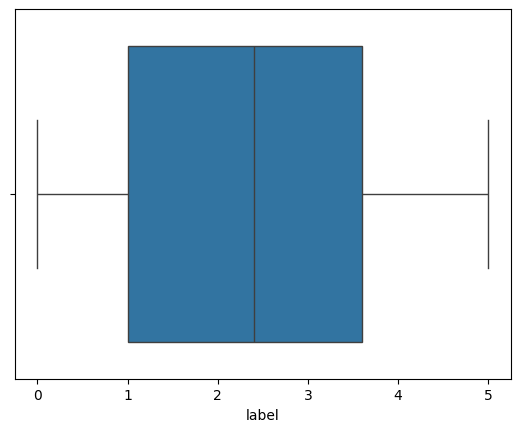

In [42]:
sns.boxplot(x='label', data=train_df)

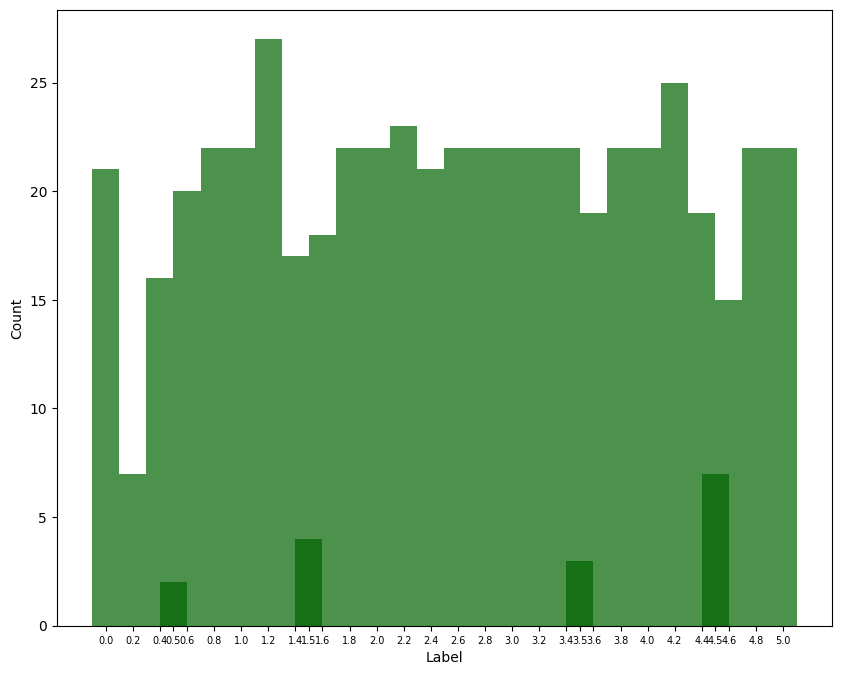

In [22]:
# validation
val_label_count = val_df['label'].value_counts()

plt.figure(figsize=(10, 8))
plt.bar(val_label_count.keys(), val_label_count.values, width=.2, alpha=.7, color='darkgreen')
plt.xticks(val_label_count.keys(), fontsize=7)
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

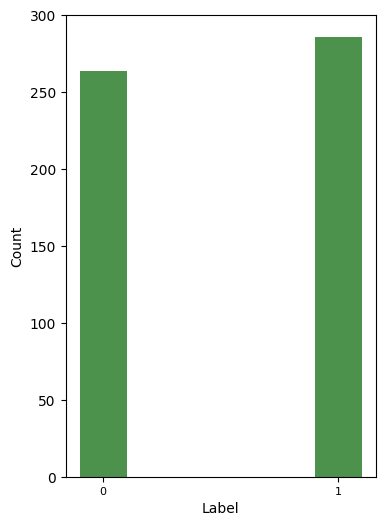

In [24]:
# validation
val_label_count = val_df['binary-label'].value_counts()

plt.figure(figsize=(4,6))

plt.bar(val_label_count.keys(), val_label_count.values, width=0.2, alpha=0.7, color="darkgreen")
plt.xticks(val_label_count.keys(), fontsize=8)
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

<Axes: xlabel='label'>

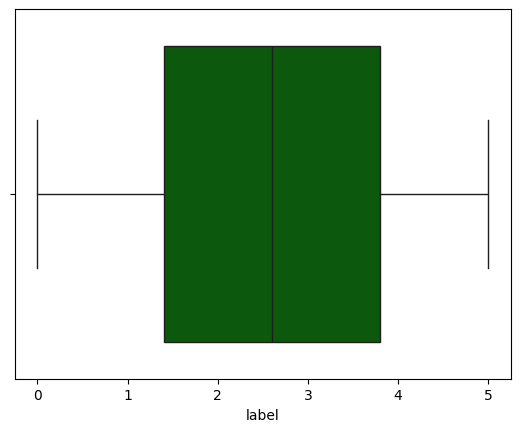

In [26]:
sns.boxplot(x='label', data=val_df, color='darkgreen')

### 텍스트 데이터 구성

In [ ]:
# rtt, sampled 차이
